# beapy

`beapy` is a Python package for obtaining data from the API of the Bureau of Economic Analysis.

In [1]:
import numpy as np
import pandas as pd
import urllib
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2
import beapy

apiKey = '3EDEAA66-4B2B-4926-83C9-FD2089747A5B'
bea = beapy.initialize(apiKey =apiKey)

## Methods for searching for data

* `getDataSetList()`: returns the available datasets.
* `getParameterList(dataSetName)`: returns the parameters of the specified dataset.
* `getParameterValues(dataSetName,ParameterName)`: returns the values accepted for a parameter of the specified dataset.

In [3]:
# Get a list of the the data sets available from the BEA along with descriptions.
bea.getDataSetList()

Datasets available through the BEA API:

1   RegionalData        : Retrieves various Regional datasets
2   NIPA                : Standard NIPA tables
3   NIUnderlyingDetail  : Standard NI underlying detail tables
4   MNE                 : Multinational Enterprises
5   FixedAssets         : Standard Fixed Assets tables

6   ITA                 : International Transactions Accounts
7   IIP                 : International Investment Position
8   GDPbyIndustry       : GDP by Industry
9   RegionalIncome      : Detailed Regional Income data sets
10  RegionalProduct     : Detailed Regional Product data sets




In [4]:
# The getDataSet() method adds a dataSetList attiribute that is a list of the available datasets:
print(bea.dataSetList)

['RegionalData', 'NIPA', 'NIUnderlyingDetail', 'MNE', 'FixedAssets', 'ITA', 'IIP', 'GDPbyIndustry', 'RegionalIncome', 'RegionalProduct']


In [5]:
# Get a list of the the parameters for the NIPA dataset
bea.getParameterList('NIPA')

Parameters for the NIPA dataset.

Parameter name             TableID
Description                The standard NIPA table identifier 
Required?                  Yes
"All" Value                N/A
Data type                  integer
Default value              N/A


Parameter name             Frequency
Description                A - Annual, Q-Quarterly, M-Monthly 
Required?                  Yes
"All" Value                N/A
Data type                  string
Default value              N/A


Parameter name             Year
Description                List of year(s) of data to retrieve (X for All) 
Required?                  Yes
"All" Value                X
Data type                  integer
Default value              N/A


Parameter name             ShowMillions
Description                A flag indicating that million-dollar data 
                           should be returned. 
Required?                  Yes
"All" Value                N/A
Data type                  string
Default value     

In [6]:
# The getParameterList() method adds a parameterList attiribute that is a list of the parameters of the chosen dataset.
print(bea.parameterList)

['TableID', 'Frequency', 'Year', 'ShowMillions']


In [7]:
# Get a list of the values that the Frequency parameter in the NIPA dataset can take:
bea.getParameterValues('NIPA','Frequency')

Values accepted for Frequency in dataset NIPA:

FrequencyID         : A 
Description         : Annual 

FrequencyID         : Q 
Description         : Quarterly 

FrequencyID         : M 
Description         : Monthly 




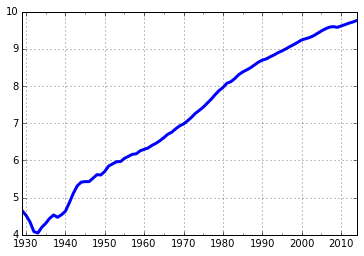

In [8]:
# Download data from Table 1.1.5, TableID: 5. and plot
results  = bea.getNipa(TableID=5,Frequency='A',Year='X')
frame =results['data']
np.log(frame['Gross domestic product']).plot(grid=True,lw=3)

## Datasets

There are 10 datasets available through the BEA API:

1. RegionalData (statistics by state, county, and MSA)
2. NIPA (National Income and Product Accounts)
3. ~~NIUnderlyingDetail (National Income and Product Accounts)~~
4. Fixed Assets 
5. ~~Direct Investment and Multinational Enterprises (MNEs)~~
6. Gross Domestic Product by Industry (GDPbyIndustry)
7. ITA (International Transactions)
8. IIP (International Investment Position)
9. Regional Income (detailed regional income and employment data sets)
10. RegionalProduct (detailed state and MSA product data sets)

`beapy` provides a separate method for accessing the data in each datset:

1. `getRegionalData.(KeyCode=None,GeoFips='STATE',Year='ALL')`
2. `getNipa.(TableID=None,Frequency=None,Year='X',ShowMillions='N')`
3. ~~`getNIUnderlyingDetail.()`~~
4. `getFixedAssets.()`
5. ~~`getDirectInvestmentMNEs.()`~~
6. `getGrossDomesticProductByIndustry.()`
7. `getIta.()`
8. `getIip.()`
9. `getRegionalIncome.()`
10. `getRegionalProduct.()`

Datasets and methods with a ~~strikethrough~~ are not currently accessible with the package.

### Regional Data

#### `getRegionalData.(KeyCode=None,GeoFips='STATE',Year='ALL')`

Method for accessing data from the US at county, state, and regional levels.

In [9]:
bea.getParameterValues('RegionalData','KeyCode')

Values accepted for KeyCode in dataset RegionalData:

KeyCode             : GDP_SP 
Description         : GDP in current dollars (state annual product) 

KeyCode             : RGDP_SP 
Description         : Real GDP in chained dollars (state annual 
                      product) 

KeyCode             : PCRGDP_SP 
Description         : Per capita real GDP (state annual product) 

KeyCode             : COMP_SP 
Description         : Compensation of employees (state annual product) 

KeyCode             : TOPILS_SP 
Description         : Taxes on production and imports less subsidies 
                      (state annual product) 

KeyCode             : GOS_SP 
Description         : Gross operating surplus (state annual product) 

KeyCode             : SUBS_SP 
Description         : Subsidies (state annual product) 

KeyCode             : TOPI_SP 
Description         : Taxes on production and imports (state annual 
                      product) 

KeyCode             : GDP_MP 
Description

In [10]:
bea.getParameterValues('RegionalData','GeoFips')

Values accepted for GeoFips in dataset RegionalData:

GeoFIPS             : COUNTY 
Description         : 0 All counties 

GeoFIPS             : STATE 
Description         : 0 All states, regions, and US 

GeoFIPS             : MSA 
Description         : 0 All metropolitan areas 

GeoFIPS             : 28089
Description         : 4 Madison, MS  

GeoFIPS             : 28091
Description         : 4 Marion, MS  

GeoFIPS             : 28093
Description         : 4 Marshall, MS  

GeoFIPS             : 28095
Description         : 4 Monroe, MS  

GeoFIPS             : 28097
Description         : 4 Montgomery, MS  

GeoFIPS             : 28099
Description         : 4 Neshoba, MS  

GeoFIPS             : 28100
Description         : 5 Kankakee, IL (Metropolitan Statistical Area) 

GeoFIPS             : 28101
Description         : 4 Newton, MS  

GeoFIPS             : 28103
Description         : 4 Noxubee, MS  

GeoFIPS             : 28105
Description         : 4 Oktibbeha, MS  

GeoFIPS      

In [11]:
bea.getParameterValues('RegionalData','Year')

Values accepted for Year in dataset RegionalData:

YearRange           : 1969-2013 
KeyCode             : AR_CI 

YearRange           : 1969-2013 
KeyCode             : AR_MI 

YearRange           : 1948-2015 
KeyCode             : AR_QI 

YearRange           : 1948-2014 
KeyCode             : AR_SI 

YearRange           : 1969-2013 
KeyCode             : CGSI_CI 

YearRange           : 1969-2013 
KeyCode             : CGSI_MI 

YearRange           : 1948-2015 
KeyCode             : CGSI_QI 

YearRange           : 1929-2014 
KeyCode             : CGSI_SI 

YearRange           : 1997-2013 
KeyCode             : COMP_SP 

YearRange           : 1969-2013 
KeyCode             : DIR_CI 

YearRange           : 1969-2013 
KeyCode             : DIR_MI 

YearRange           : 1948-2015 
KeyCode             : DIR_QI 

YearRange           : 1929-2014 
KeyCode             : DIR_SI 

YearRange           : 1948-2014 
KeyCode             : DPI_SI 

YearRange           : 1969-2013 
KeyCode            

In [12]:
bea.getParameterValues('RegionalData','KeyCode')

Values accepted for KeyCode in dataset RegionalData:

KeyCode             : GDP_SP 
Description         : GDP in current dollars (state annual product) 

KeyCode             : RGDP_SP 
Description         : Real GDP in chained dollars (state annual 
                      product) 

KeyCode             : PCRGDP_SP 
Description         : Per capita real GDP (state annual product) 

KeyCode             : COMP_SP 
Description         : Compensation of employees (state annual product) 

KeyCode             : TOPILS_SP 
Description         : Taxes on production and imports less subsidies 
                      (state annual product) 

KeyCode             : GOS_SP 
Description         : Gross operating surplus (state annual product) 

KeyCode             : SUBS_SP 
Description         : Subsidies (state annual product) 

KeyCode             : TOPI_SP 
Description         : Taxes on production and imports (state annual 
                      product) 

KeyCode             : GDP_MP 
Description

#### Example: Converging relative per capita incomes in the US

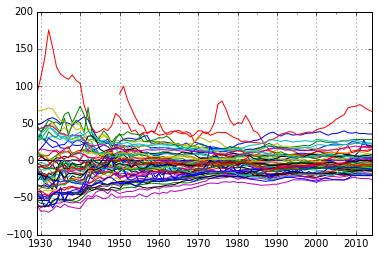

In [13]:
# Get per capita personal income at the state level for all years.
result = bea.getRegionalData(KeyCode='PCPI_SI',GeoFips = 'STATE', Year = 'ALL')
frame = result['data']

# For each state including Washington, D.C., find the percentage difference between state pc income and US pc income.
for state in frame.columns:
    f = 100*(frame[state] - frame['United States'])/frame['United States']
    f.plot(grid=True)